# Question 1 : Classification using Naive Bayes

Can glucose and blood pressure data classify whether a patient has diabetes or not ? If yes, which classification algorithm should you use ?

The dataset **diabetes_classification.csv** has 3 columns and 995 entries with the above data.


1. Load the dataset.

In [2]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()


,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


2. The dataset has two feature columns and one target column. Plot a bar graph or histogram showing the distribution of values in the feature columns (count of each value).

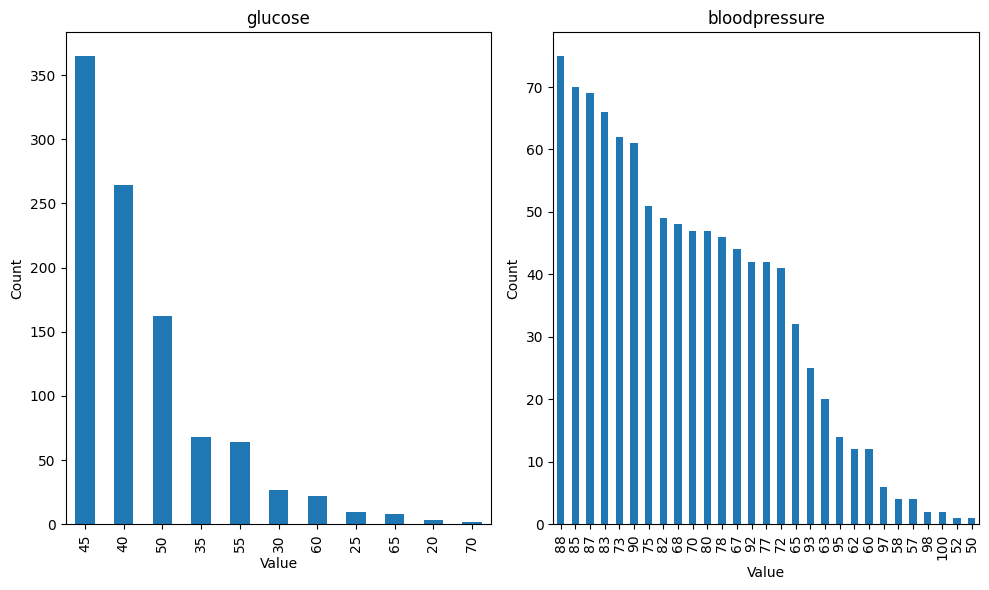

In [4]:
import matplotlib.pyplot as plt

# Select the feature columns
feature_columns = ['glucose', 'bloodpressure']

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Set the figure size

for i, column in enumerate(feature_columns):
    plt.subplot(1, len(feature_columns), i+1)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Count')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()  # Display the plot


 The feature column **glucose** has a somewhat Gaussian distribution of data. So we will try out Gaussian Naive Bayes classification for the data using Scikit-Learn.

3. Split the dataset.
4. Fit a Gaussian NB model on the data. Make predictions and find the accuracy score.

Optional :
5. Compare the model with other classification algorithms like Logistic Regression, KNN, decision tree etc.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Select the 'glucose' column and the target column
selected_columns = ['glucose', 'diabetes']
new_df = df[selected_columns]

# Display the new dataframe
print(new_df.head())

# Split the data into features and target
X = new_df.drop('diabetes', axis=1)
y = new_df['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Gaussian NB model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

   glucose  diabetes
0       40         0
1       40         0
2       45         1
3       45         0
4       40         1
Accuracy: 68.34170854271356 %


# Question 2 : Regression using SVM and Tree Algorithms

In this question, we will be using the **insurance.csv** file which contain information on insurance charges based on the following informations: age,sex,bmi,region,number of children and whether the person is a smoker or not. You need to predict the charges based on the information given.

### 1. Load the data.

In [25]:
import pandas as pd
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Separate the numerical and categorical columns.
### 3. Label Encode the categorical columns.
### 4. Scale the numerical columns. (Scale the charges separately so that you can calculate errors afterwards.)

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Display the separated columns
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

# Lable encoder 
label_encoder = LabelEncoder()
for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])

# Scale numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



# Display the updated DataFrame
print(df.head())

Numerical columns: ['age', 'bmi', 'children', 'charges']
Categorical columns: ['sex', 'smoker', 'region']
        age  sex       bmi  children  smoker  region   charges
0 -1.438764    0 -0.453320 -0.908614       1       3  0.298584
1 -1.509965    1  0.509621 -0.078767       0       2 -0.953689
2 -0.797954    1  0.383307  1.580926       0       2 -0.728675
3 -0.441948    1 -1.305531 -0.908614       0       1  0.719843
4 -0.513149    1 -0.292556 -0.908614       0       1 -0.776802


### 5. Split the data.

In [27]:
from sklearn.model_selection import train_test_split
# Separate the features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 6)
X_test shape: (268, 6)
y_train shape: (1070,)
y_test shape: (268,)


### 6. Support Vector Regressor

Here , you will use the SVR model from sklearn.svm and fit it on the training data. Then predict on the test data and calaculate MAE, MSE. But...

The SVR class contains many hyperparameters, example : kernel can have the following values : linear, rbf, poly, sigmoid.

Use **RandomizedSearchCV** from sklearn.model_selection , create a dictionary with keys 'kernel' and 'gamma' . As values of the keys, create a list of some possible values. Run a 3-fold cross validation test (cv=3) and find the best parameters. Then initiate the SVR model with those parameters.

In [28]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the hyperparameter search space
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 0.01, 0.001, 0.0001]
}

# Create an instance of SVR
svr = SVR()

# Perform randomized search cross-validation
random_search = RandomizedSearchCV(svr, param_distributions=param_grid, cv=3, n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate mean absolute error (MAE) and mean squared error (MSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", best_params)
print("MAE:", mae)
print("MSE:", mse)

Best Parameters: {'kernel': 'rbf', 'gamma': 0.1}
MAE: 0.21454631384572234
MSE: 0.15341221851192893


### 7. AdaBoost Regressor

We would do similar for AdaBoostRegressor from sklearn.ensemble . Here, the hyperparameters are n_estimators and loss.

Instead of RandomizedSearchCV, let's try GridSearchCV . Find the best parameters and then find errors on test data using the model with best parameters.

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [50, 100, 150],
    'loss': ['linear', 'square', 'exponential']
}

# Create an instance of AdaBoostRegressor
ada_boost = AdaBoostRegressor()

# Perform grid search cross-validation
grid_search = GridSearchCV(ada_boost, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate mean absolute error (MAE) and mean squared error (MSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", best_params)
print("MAE:", mae)
print("MSE:", mse)

Best Parameters: {'loss': 'linear', 'n_estimators': 50}
MAE: 0.31145489507218665
MSE: 0.16681869660612794


8. Now carry the same procedure for Random Forest Regressor and for Gradient Boosting Regression.
9. Finally, use <a href="https://xgboost.readthedocs.io/en/stable/get_started.html"> XGBoost Regressor </a> and compare all the models. Comment which model had the least error (MAE and MSE).
You will be required to run  <code> !pip install xgboost </code> to import xgboost models.

In [31]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the hyperparameter search spaces for each model
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10]
}

param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Random Forest Regressor
rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Gradient Boosting Regression
gb = GradientBoostingRegressor()
grid_search_gb = GridSearchCV(gb, param_grid=param_grid_gb, cv=3)
grid_search_gb.fit(X_train, y_train)
best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_
y_pred_gb = best_model_gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

# XGBoost Regressor
xgb = XGBRegressor()
grid_search_xgb = GridSearchCV(xgb, param_grid=param_grid_xgb, cv=3)
grid_search_xgb.fit(X_train, y_train)
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print("Random Forest Regressor")
print("Best Parameters:", best_params_rf)
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print()

print("Gradient Boosting Regression")
print("Best Parameters:", best_params_gb)
print("MAE:", mae_gb)
print("MSE:", mse_gb)
print()

print("XGBoost Regressor")
print("Best Parameters:", best_params_xgb)

Random Forest Regressor
Best Parameters: {'max_depth': 5, 'n_estimators': 150}
MAE: 0.20799594931080273
MSE: 0.13422876988078566

Gradient Boosting Regression
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
MAE: 0.20531478773293826
MSE: 0.12854950270428647

XGBoost Regressor
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}


# Question 3 : Classification using SVM and Tree Algorithms

In this question, we will be using the **bookmyshow_ads.csv** file which contain information on whether an url is spam or not based on 32 features. You need to classify the url as spam or not spam based on the information given.

### 1. Load the data.

In [42]:
import pandas as pd
df = pd.read_csv('bookmyshow_ads.csv')
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,0,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
1,2,1,1,1,1,1,0,-1,1,0,...,1,1,0,0,-1,0,1,1,1,0
2,3,1,-1,1,1,1,0,0,0,0,...,1,1,1,0,1,0,1,-1,0,0
3,4,1,-1,1,1,1,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
4,5,1,-1,0,1,1,0,1,1,0,...,0,1,0,0,-1,0,1,1,1,1


### 2. Split the data.

In [43]:
from sklearn.model_selection import train_test_split

# Separate the features and target
X = df.drop('Result', axis=1)
y = df['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8844, 31)
X_test shape: (2211, 31)
y_train shape: (8844,)
y_test shape: (2211,)


### 3. Model Comparison

Similar to the previous question, use the following classifier models from sklearn and compare them:
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boost
5. XGBoost

For each model, you may also try to find the best hyperparameters using GridSearch Cross Validation or RandomizedSearch Cross Validation.

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Lable encoder 
label_encoder = LabelEncoder()
for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])

# Scale numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

'''# Encode categorical columns using one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer([('encoder', OneHotEncoder(), categorical_cols)],
                                 remainder='passthrough')
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)'''



# Initialize the classifiers
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
adaboost_classifier = AdaBoostClassifier()
gb_classifier = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()

# Train and evaluate the classifiers
classifiers = [dt_classifier, rf_classifier, adaboost_classifier, gb_classifier, xgb_classifier]
classifier_names = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']

for classifier, name in zip(classifiers, classifier_names):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

ValueError: could not convert string to float: '1-1813'

# Question 4 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups. 

### 1. Import the necessary modules

### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

### 6. KMeans Model Training - Scratch

Now, code the KMeans Model from scratch. Train it on the data, and try to find out when you have the labels with maximum accuracy when compared to the labels of the SkLearn model.

### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

### 8. DBSCAN model training - Scratch

Code the DBScan model. For the same epsilon and min_samples values, fit the model on the data. You should receive the same silhouette score.